## DS9 : Consider the dataset named iris (link given below) which consists of data of different species and their attributes. Perform the following operations to the dataset:
### a. Import the data set
### b. Store the split data into separate variables.
### c. Create a naive Bayes model on the training dataset
### d. Now predict the data model for a testing dataset that you have separated in bit b.

### Upload the file which contains the code for the above operations.

In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('Iris.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [16]:
df.drop('Id',axis = 1,inplace = True)

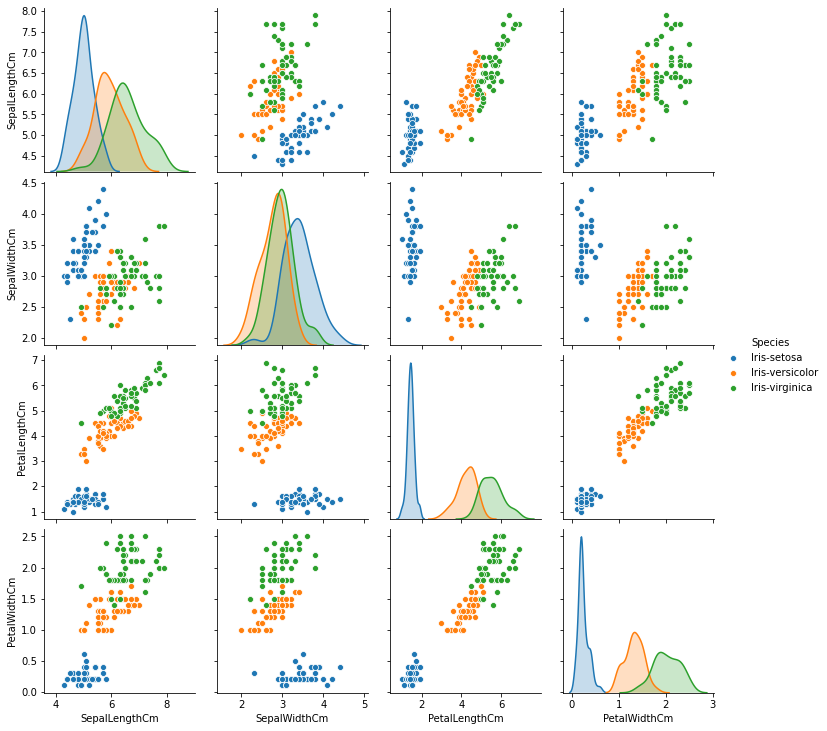

In [17]:
g = sns.pairplot(df, hue='Species', markers='o')

#### Observations:


It can be clearly seeen that the relation between petal length and pethal width is a good indicator of the species

sepal width alone is a poor differntiating variable among the species

Iris-versicolor and iris-virginica are difficult to differentiate on the basis sepal length and sepal width

In [18]:
X = df.drop('Species',axis  =1)
y = df['Species']

#### splitting data and storing it into different variables

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state =17)

#### Create a naive Bayes model on the training dataset

In [20]:
gauss  = GaussianNB()
gauss.fit(X_train,y_train)
print(gauss)

GaussianNB(priors=None, var_smoothing=1e-09)


#### predicting the data model for a testing dataset 

In [21]:
y_expect = y_test
y_pred = gauss.predict(X_test)
print(accuracy_score(y_expect,y_pred))

0.96


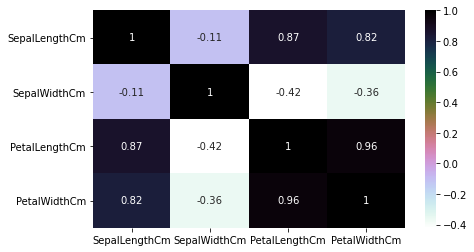

In [22]:


plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()



In [23]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.95      0.95      0.95        22
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50



Text(0.5, 0, 'PetalWidth')

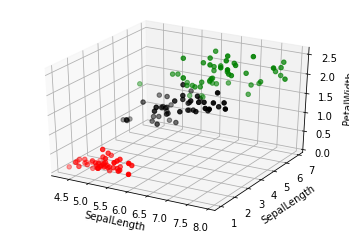

In [24]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
df1 = df[df['Species'].str.contains("Iris-setosa")]
df2 = df[df['Species'].str.contains("Iris-virginica")]
df3 = df[df['Species'].str.contains("Iris-versicolor")]
x =df1.SepalLengthCm
y =df1.PetalLengthCm
z =df1.PetalWidthCm
ax.scatter(x, y, z, c='r', marker='o')
x =df2.SepalLengthCm
y =df2.PetalLengthCm
z =df2.PetalWidthCm
ax.scatter(x, y, z, c='g', marker='o')
x =df3.SepalLengthCm
y =df3.PetalLengthCm
z =df3.PetalWidthCm
ax.scatter(x, y, z, c='k', marker='o')



ax.set_xlabel('SepalLength')
ax.set_ylabel('SepalLength')
ax.set_zlabel('PetalWidth')